In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os, sys

In [46]:
sys.path.append(os.path.abspath('../'))
import sfr_methods

In [47]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [48]:
usable_paths = np.load('../usable_v3_paths.npy')

In [49]:
def load_dict(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [50]:
dict_list = []
df_list = []

for path in usable_paths:
    filename = path.split('/')[-1].split('.')[0]
    
    galdict = load_dict('../Form_Resources/Dicts_Avg_SFR_Thresholds/' + filename + '.dict.pkl')
    galdf = pd.read_pickle('../Form_Resources/DFs/' + filename + '.df.pkl')
    
    dict_list.append(galdict)
    df_list.append(galdf)

In [51]:
def ret_bins(a, b, n):
    bins = []
    binvals = np.linspace(a, b, n)
    
    for i in range(1, len(binvals)):
        bins.append((binvals[i - 1], binvals[i]))
        
    return bins

In [52]:
def sfr_props(rdf, galdict, galdf):
    galaxy_df_spiral = rdf[(rdf['Spiral Arm (3, 3)'] == True) & (rdf['Nonspiral Arm (3, 3)'] == False)]
    galaxy_df_nspiral = rdf[rdf['Nonspiral Arm (3, 3)'] == True]
    
    avg_spiral_sfr, sig_avg_spiral_sfr = sfr_methods.get_sfr(galaxy_df_spiral.index, galdf, galdict, avg=True)
    avg_nspiral_sfr, sig_avg_nspiral_sfr = sfr_methods.get_sfr(galaxy_df_nspiral.index, galdf, galdict, avg=True)
    
    if (avg_spiral_sfr == 0) or (avg_nspiral_sfr == 0):
        return np.nan, np.nan
        
    prop = (avg_spiral_sfr - avg_nspiral_sfr) / avg_nspiral_sfr
    sig_prop = prop * ((sig_avg_spiral_sfr / avg_spiral_sfr)**2 + (sig_avg_nspiral_sfr / avg_nspiral_sfr)**2)**0.5
    
    return prop, sig_prop

In [53]:
bins = ret_bins(0.1, 1.5, 10)

In [54]:
bins

[(0.1, 0.25555555555555554),
 (0.25555555555555554, 0.4111111111111111),
 (0.4111111111111111, 0.5666666666666667),
 (0.5666666666666667, 0.7222222222222222),
 (0.7222222222222222, 0.8777777777777778),
 (0.8777777777777778, 1.0333333333333334),
 (1.0333333333333334, 1.188888888888889),
 (1.188888888888889, 1.3444444444444446),
 (1.3444444444444446, 1.5)]

In [55]:
radial_prop_dicts = []

for i in range(len(dict_list)):
    galdict = dict_list[i]
    galdf = df_list[i]
    
    df = galdf.copy()
    
    df = df.dropna()
    df = df[df['S/N $H_{\\alpha}$'] > 0]
    df = df[(df['$r/r_e$'] > 0.1) & (df['$r/r_e$'] < 1.5)]
    df = df[(df['Comp'] == 0) & (df['AGN'] == 0) & (df['Seyfert'] == 0) & (df['Liner'] == 0)]
    df = df[(df['Spiral Arm (3, 3)'] == True) | (df['Nonspiral Arm (3, 3)'] == True)]
    
    binned_dfs = []
    
    for rbin in bins:
        rdf = df[(df['$r/r_e$'] > rbin[0]) & (df['$r/r_e$'] <= rbin[1])]
        binned_dfs.append(rdf)
    
    for j in range(len(binned_dfs)):
        binned_df = binned_dfs[j]
        prop, sig_prop = sfr_props(binned_df, galdict, galdf)
        
        radial_prop_dict = {
            'mangaid': galdict['mangaid'],
            'radial_bin': bins[j],
            'prop': prop,
            'sig_prop': sig_prop
        }
        
        radial_prop_dicts.append(radial_prop_dict)
        
        print('RADIAL BIN NUMBER', j, '\n')
    
    print('Gal #', i)

RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 0
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 1
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 2
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 3
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 



RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 39
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 40
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 41
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 42
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 43
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BI

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 79
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 80
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 81
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 82
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 83
RADIAL BIN NUMBER 0 

RADIAL BI

RADIAL BIN NUMBER 8 

Gal # 118
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 119
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 120
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 121
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 122
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADI

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 158
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 159
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 160
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 161
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 162
RADIAL BIN NUMBER 0 

RADI

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 197
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 198
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 199
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 200
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 201
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADI

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 237
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 238
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 239
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 240
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 241
RADI

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 276
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 277
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 278
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 279
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 280
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADI

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 316
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 317
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 318
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 319
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUM

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 355
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 356
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 357
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 358
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 359
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADI

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 395
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 396
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 397
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 398
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUM

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 434
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 435
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 436
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 437
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 438
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADI

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 474
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 475
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 476
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 477
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUM

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 513
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 514
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 515
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 516
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 517
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADI

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 553
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 554
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 555
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 556
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUM

RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 593
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 594
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 595
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 596
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUM

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 632
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 633
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 634
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 635
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 636
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADI

RADIAL BIN NUMBER 8 

Gal # 671
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 672
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 673
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 674
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 675
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADI

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 711
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 712
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 713
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 714
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 715
RADIAL BIN NUMBER 0 

RADI

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 750
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 751
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 752
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 753
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 754
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADI

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 790
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 791
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 792
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 793
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 794
RADI

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 829
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 830
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 831
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 832
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADIAL BIN NUMBER 4 

RADIAL BIN NUMBER 5 

RADIAL BIN NUMBER 6 

RADIAL BIN NUMBER 7 

RADIAL BIN NUMBER 8 

Gal # 833
RADIAL BIN NUMBER 0 

RADIAL BIN NUMBER 1 

RADIAL BIN NUMBER 2 

RADIAL BIN NUMBER 3 

RADI

In [56]:
combined_df = pd.DataFrame(radial_prop_dicts)

In [57]:
combined_df

,mangaid,radial_bin,prop,sig_prop
0,1-10166,"(0.1, 0.25555555555555554)",NaN,NaN
1,1-10166,"(0.25555555555555554, 0.4111111111111111)",0.030092,0.013571
2,1-10166,"(0.4111111111111111, 0.5666666666666667)",-0.156021,-0.050635
3,1-10166,"(0.5666666666666667, 0.7222222222222222)",-0.037248,-0.010675
4,1-10166,"(0.7222222222222222, 0.8777777777777778)",0.117693,0.073572
...,...,...,...,...
7510,1-96597,"(0.7222222222222222, 0.8777777777777778)",11.314345,2.138649
7511,1-96597,"(0.8777777777777778, 1.0333333333333334)",10.873901,1.994838
7512,1-96597,"(1.0333333333333334, 1.188888888888889)",2.282564,3.314899
7513,1-96597,"(1.188888888888889, 1.3444444444444446)",1.020818,0.342924


In [58]:
exdf = combined_df.dropna()

In [59]:
exdf

,mangaid,radial_bin,prop,sig_prop
1,1-10166,"(0.25555555555555554, 0.4111111111111111)",0.030092,0.013571
2,1-10166,"(0.4111111111111111, 0.5666666666666667)",-0.156021,-0.050635
3,1-10166,"(0.5666666666666667, 0.7222222222222222)",-0.037248,-0.010675
4,1-10166,"(0.7222222222222222, 0.8777777777777778)",0.117693,0.073572
5,1-10166,"(0.8777777777777778, 1.0333333333333334)",0.193418,0.091928
...,...,...,...,...
7510,1-96597,"(0.7222222222222222, 0.8777777777777778)",11.314345,2.138649
7511,1-96597,"(0.8777777777777778, 1.0333333333333334)",10.873901,1.994838
7512,1-96597,"(1.0333333333333334, 1.188888888888889)",2.282564,3.314899
7513,1-96597,"(1.188888888888889, 1.3444444444444446)",1.020818,0.342924


In [60]:
binsdf = exdf['radial_bin'].unique()

In [61]:
prop1 = exdf[exdf['radial_bin'] == bins[3]].prop

(array([147., 124.,  81.,  51.,  32.,  29.,  23.,   5.,  13.,   5.,   5.,
          4.,   4.,   2.,   2.,   2.,   1.,   3.,   1.,   1.,   0.,   1.,
          3.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9

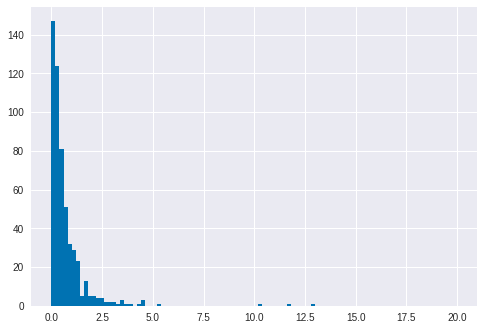

In [62]:
plt.hist(prop1, bins=100, range=(0, 20))

In [63]:
exdf = exdf[exdf.prop < 20]

In [64]:
def ret_averaged_sfrs(sfrs, sig_sfrs):
    sfrs = np.array(sfrs)
    sig_sfrs = np.array(sig_sfrs)
        
    variances = np.square(sig_sfrs)
    sum_variances = variances.sum()
    avg_variance = sum_variances / len(sig_sfrs)**2
    avg_stdv = np.sqrt(avg_variance)
    
    mean = sfrs.mean()
        
    return mean, avg_stdv

In [65]:
avg_props = []
avg_sig_props = []

for rbin in bins:
    sfrs = exdf[exdf.radial_bin == rbin].prop
    sig_sfrs = exdf[exdf.radial_bin == rbin].sig_prop
    
    a, b = ret_averaged_sfrs(sfrs, sig_sfrs)
    
    avg_props.append(a)
    avg_sig_props.append(b)

<ErrorbarContainer object of 3 artists>

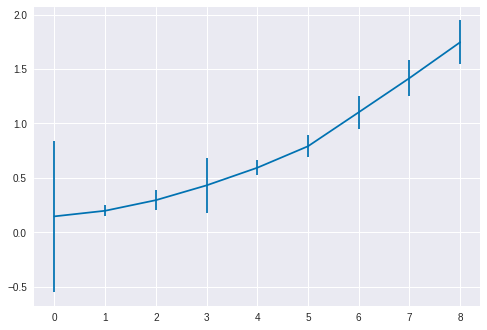

In [66]:
plt.errorbar(np.arange(len(avg_props)), avg_props, yerr=avg_sig_props)